## 0. Importación de librerías

En esta sección se importan librerías y se definen atajos de $\LaTeX$.

$$
\newcommand{\pap}[1]{\left(#1\right)}
\newcommand{\pas}[1]{\left[#1\right]}
\newcommand{\pac}[1]{\left\{#1\right\}}
\newcommand{\pav}[1]{\left\vert#1\right\vert}
\newcommand{\rv}{\vec{r}}
\newcommand{\rb}{\mathbf{r}}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xv}{\vec{x}}
\newcommand{\xbr}{\bar{x}}
\newcommand{\ome}{\omega}
\newcommand{\lam}{\lambda}
\newcommand{\dd}{\mathrm{d}}
\newcommand{\ee}{\mathrm{e}}
\newcommand{\eps}{\epsilon}
\newcommand{\iun}{\hat{\boldsymbol{\imath}}}
\newcommand{\jun}{\hat{\boldsymbol{\jmath}}}
\newcommand{\pr}{^{\prime}}
\newcommand{\chinu}{\chi_{\nu}^2}
$$


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.integrate import quad
%matplotlib inline

## 1. Calculando $\pi$ con Monte-Carlo

Tal como se muestra en el video, en un cuadrado de lado $2$ (que supondremos centrado en el origen) la proporción de puntos que están dentro del círculo de radio $1$ y el cuadrado total es $\pi/4$. Esta es la esencia para calcular $\pi$ en el siguiente código que utiliza el paquete `random`.

In [45]:
Nmax=1000000
N=0
M=0
rd.seed(65)
while N<Nmax-1:
    x=rd.uniform(-1,1)
    y=rd.uniform(-1,1)
    N+=1
    if np.sqrt(x**2+y**2)<1:
        M+=1
print("El valor de pi estimado fue de {0}, mientras que el valor de pi real es {1}"\
.format(np.round(4*M/N,4),np.round(np.pi,4)))

El valor de pi estimado fue de 3.1415, mientras que el valor de pi real es 3.1416


La siguiente línea de código sí es más similar a lo que se hace en el video con `numpy.random`.

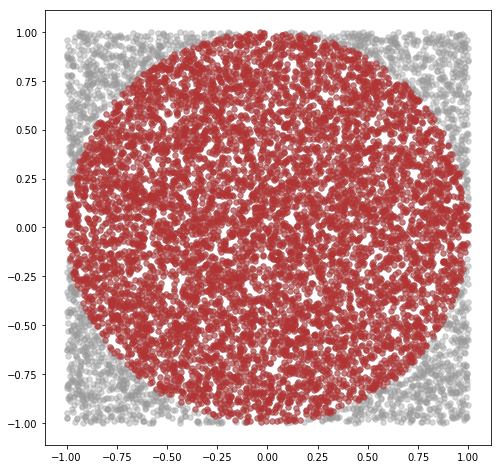

El valor de pi estimado fue de 3.1568, mientras que el valor de pi real es 3.1416


In [52]:
Nmax=10000
np.random.seed(65)
###############################################################################
# Parte incompleta, saber definir x,y,xc,yc (ver video)
###############################################################################
plt.figure(figsize=(8,8))
plt.scatter(x,y,marker='o',s=30,color=(0.6,0.6,0.6,0.4))
plt.scatter(xc,yc,marker='o',s=30,color=(0.7,0.2,0.2,0.5))
plt.show()
print("El valor de pi estimado fue de {0}, mientras que el valor de pi real es {1}"\
.format(np.round(4*len(xc)/len(x),4),np.round(np.pi,4)))

## 2. Calculando la integral $\int_{-5}^5 \ee^{-x^2}\dd x$

Por Monte-Carlo, esta integral se puede ver como la fracción de puntos en el rectángulo definido por el intervalo $\pas{-5,5}$ y de altura 1 por debajo de la función $f(x)=\ee^{-x^2}$ multiplicado por el área del rectángulo (en este caso esa área es 10). Primero hacemos una solución con el paquete `random`.

In [72]:
f=lambda x:np.exp(-x**2)
xmin,xmax=-5,5
ymin,ymax=0,1
Nmax=1000000
N=0
M=0
rd.seed(65)
while N<Nmax-1:
    x=rd.uniform(xmin,xmax)
    y=rd.uniform(ymin,ymax)
    N+=1
    if y<f(x):
        M+=1
integ_scipy,err=quad(f,xmin,xmax)
print("El valor de la integral hallado con Monte-Carlo es {0}".format((ymax-ymin)*(xmax-xmin)*M/N))
print("El valor de la integral hallado con Scipy es {0}".format(integ_scipy))
print("El valor de la integral impropia es {0}".format(np.sqrt(np.pi)))

El valor de la integral hallado con Monte-Carlo es 1.7711417711417712
El valor de la integral hallado con Scipy es 1.7724538509027912
El valor de la integral impropia es 1.7724538509055159


Y ahora se resuelve con métodos de `numpy.random`.

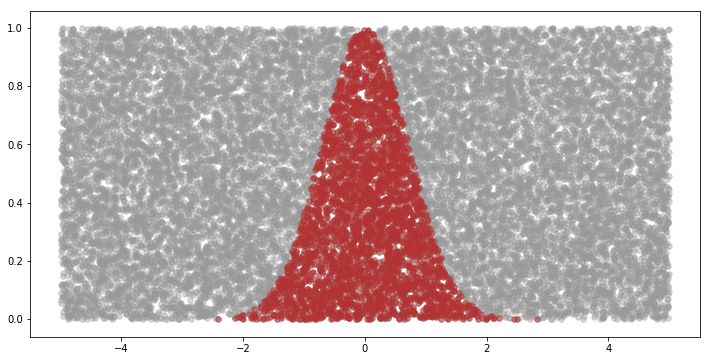

El valor de la integral hallado con Monte-Carlo es 1.7855
El valor de la integral hallado con Scipy es 1.7724538509027912
El valor de la integral impropia es 1.7724538509055159


In [75]:
Nmax=20000
f=lambda x:np.exp(-x**2)
xmin,xmax=-5,5
ymin,ymax=0,1
np.random.seed(65)
###############################################################################
# Parte incompleta, saber definir x,y,xc,yc (ver video)
###############################################################################
plt.figure(figsize=(12,6))
plt.scatter(x,y,marker='o',s=30,color=(0.6,0.6,0.6,0.4))
plt.scatter(xc,yc,marker='o',s=30,color=(0.7,0.2,0.2,0.5))
plt.show()
print("El valor de la integral hallado con Monte-Carlo es {0}"\
      .format((ymax-ymin)*(xmax-xmin)*len(xc)/len(x)))
###############################################################################
# Parte incompleta, debe saber calcular la integral integ_scipy por scipy (ver video)
###############################################################################
print("El valor de la integral hallado con Scipy es {0}".format(integ_scipy))
print("El valor de la integral impropia es {0}".format(np.sqrt(np.pi)))

## 3. Metrópolis-Hastings para una distribución $y(x)$

Queremos generar un cierto número de valores aleatorios dentro del intervalo $\pas{10,50}$ que sigan la distribución de densidad (no necesariamente normalizada): 
$$
y(x)=\exp\pap{-\frac{(x-30)^2}{20}}
\tag{1}
$$

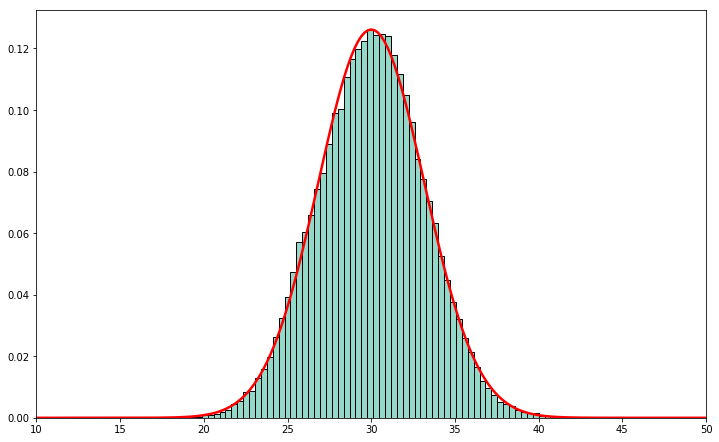

In [110]:
fy=lambda x:np.exp(-(x-30)**2/20)
xmin,xmax=10,50
Nmax=100000
walk=[]
np.random.seed(30)
walk.append(np.random.rand()*(xmax-xmin)+xmin)
for i in range(Nmax-1):
###############################################################################
# Parte incompleta, debe usar Metrópolis Hashtings para terminar de llenar walk
# (ver video)
###############################################################################
walk=np.array(walk)
plt.figure(figsize=(12,12/1.6))
plt.hist(walk,bins=66,density=True,color=(0.3,0.75,0.65,0.6),edgecolor="k")
plt.xlim(xmin,xmax)
xx=np.linspace(xmin,xmax,201)
norm,err=quad(fy,xmin,xmax)
yy=fy(xx)/norm
plt.plot(xx,yy,linewidth=2.5,color='r')
plt.show()